# Online learning demo

## load the boston housing dataset

In [1]:
import csv
import numpy as np
X = []
y = []
with open('/Users/zetong/Boston.csv', newline='') as csvfile:
    boston = csv.reader(csvfile, delimiter=' ', quotechar='|')
    next(boston)
    for row in boston:
        datalist = row[0].split(",")
        X.append(datalist[1:-1])
        y.append(datalist[-1])
X = np.asarray(X).astype(float)
# add the offset term for linear regression
offset = np.ones((X.shape[0], 1))
X = np.append(X, offset, axis=1)
y = np.asarray(y).astype(float)

## spliting the training and testing set

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(404, 14) (102, 14)


## functions to calculate gradients, loss and make predictions

In [3]:
def get_gradient(x, y, beta, lamb):
    x = np.reshape(x, (x.shape[0], 1))
    return np.add(2*(y - np.dot(np.transpose(x), beta)) * (-x), lamb * np.divide(beta, np.absolute(beta)))

In [4]:
def predict(x, beta, batch=True):
    if not batch:
        x = np.reshape(x, (x.shape[0], 1))
        return np.reshape(np.dot(np.transpose(x), beta), 1)
    else:
        return np.dot(x, beta)

In [5]:
def get_batch_gradient(x_batch, y_batch, beta, lamb, batch_size):
    gradient_sum = np.zeros((x_batch.shape[1], 1))
    for x, y in zip(x_batch, y_batch):
        gradient_sum = np.add(gradient_sum, get_gradient(x, y, beta, lamb))
    return gradient_sum / (2*batch_size)

In [6]:
def get_loss(y, y_hat):
    return np.sum(np.absolute(y-y_hat)) / y.shape[0]

## begin the online learning algorithm

In [7]:
epochs = 1000
learning_rate = 0.000000001
losses = []
steps = 0
batch_size = 16
beta = np.random.rand(X.shape[1], 1)
for i in range(epochs):
    while steps < X_train.shape[0]:
        x_batch = X[steps:steps+batch_size]
        y_batch = y[steps:steps+batch_size]
        beta -= learning_rate * get_batch_gradient(x_batch, y_batch, beta, 0.2, batch_size)
        y_hat = predict(X_test, beta)
        losses.append(get_loss(y_test, y_hat))
        steps += batch_size
    steps = 0

## loss over rounds

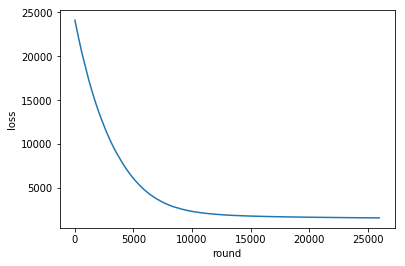

In [9]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('round')
plt.show()